## Contents <a id="top"></a>
### [1. HR Analytics](#HR_Analytics)
   - [1.1. Load and Sample the data](#1.1.)
   - [1.2. Build the Classification Model(s)](#1.2.)
   
       - [1.2.1. Naïve Baseline Model](#1.2.1.) 
       
       - [1.2.2. Logistic Regression Model](#1.2.2.)        
          - [1.2.2.1.  Improve the model - Linear Regression](#1.2.2.1.)          

       - [1.2.3. Multilayer Perceptron Classifier(MLP)](#1.2.3.)
          - [1.2.3.1.  GridSearch Multilayer Perceptron (MLP)](#1.2.3.1.)     

       - [1.2.4. Decision Tree Classifier](#1.2.4.)
          - [1.2.4.1.  GridSearch Decision Tree Model](#1.2.4.1.)
          
       - [1.2.5. XGBoost - eXtreme Gradient Boosting Classifier](#1.2.5.)          
          - [1.2.5.1.  Improve XGBoost - eXtreme Gradient Boosting Classifier](#1.2.5.1.)
    
   - [1.3. Summarize the findings](#1.3.)   
       - [1.3.1. Classification Final Model](#1.3.1.)


### [2. Airbnb](#AIRBNB)
   - [2.1. Load and Sample the data](#2.1.)
   - [2.2. Build the Regression Model(s)](#2.2.)   
       - [2.2.1. Naïve Baseline Model](#2.2.1.) 
       - [2.2.2. Linear Regression Model](#2.2.2.)        
          - [2.2.2.1. Improve Logistic Regression Model](#2.2.2.1.)
       - [2.2.3. Decision Tree Regressor](#2.2.3.)       
          - [2.2.3.1. Improve Decision Tree Regressor](#2.2.3.1.)

       - [2.2.4. AdaBoost Regressor on Decision Tree Regressor](#2.2.4.)  
          - [2.2.4.1. Improve AdaBoost Regressor on Decision Tree Regressor](#2.2.4.1.)       

   - [2.3. Summarize the findings](#2.3.)   
       - [2.3.1. Regression Final Model](#2.3.1.)

In [1]:
# import the required packages

import pandas as pd
import numpy as np
%matplotlib inline
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# for Q-Q plots
import scipy.stats as stats

# Dealing with outliers
from feature_engine.outliers import Winsorizer

# Transforming numerical variables 
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer

from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import OneHotEncoder

from feature_engine.encoding import CountFrequencyEncoder
# for discretization
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler
# the scalers - for mean normalisation
from sklearn.preprocessing import RobustScaler
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler

# Machine Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from scipy import stats

# Ensemble Learning Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor #- Ensemble of Descision Trees
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier,AdaBoostRegressor
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC



# Metrics to Measure performance of model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import statsmodels.api as sm


# find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

## 1. HR Analytics <a id="HR_Analytics"></a>
[Back to Top](#top)

### 1.1. Load and Sample the data  <a id="1.1."></a>
[Back to Top](#top)

In [2]:
data_hr = pd.read_csv("./datasets/hr_data_new.csv")
data_hr_backup = data_hr.copy() #keep a copy of df 

In [3]:
data_hr.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,region_region_2,...,department_Procurement,department_R&D,department_HR,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred,education_Bachelor's,education_Master's & above,education_Below Secondary,is_promoted
0,0.617199,0,-0.406686,0.153499,1.145246,-0.774513,1,0,-1.088511,0,...,0,0,0,1,0,0,1,0,0,1
1,0.989794,1,-0.406686,-0.321341,1.145246,-0.002563,1,0,-1.088511,0,...,0,0,0,1,0,0,1,0,0,1
2,-0.873178,1,-0.406686,2.052856,0.289063,2.313285,1,0,-1.504251,0,...,0,0,0,0,1,0,0,1,0,1
3,1.362388,1,-0.406686,-1.271019,0.289063,-1.160488,1,1,-0.672771,0,...,0,0,0,0,1,0,1,0,0,1
4,-0.873178,1,-0.406686,-1.271019,0.289063,-1.160488,0,0,-0.257032,0,...,0,0,0,1,0,0,1,0,0,1


In [4]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   9336 non-null   float64
 1   gender                        9336 non-null   int64  
 2   no_of_trainings               9336 non-null   float64
 3   age                           9336 non-null   float64
 4   previous_year_rating          9336 non-null   float64
 5   length_of_service             9336 non-null   float64
 6   KPIs_met >80%                 9336 non-null   int64  
 7   awards_won?                   9336 non-null   int64  
 8   avg_training_score            9336 non-null   float64
 9   region_region_2               9336 non-null   int64  
 10  region_region_22              9336 non-null   int64  
 11  region_region_7               9336 non-null   int64  
 12  region_region_15              9336 non-null   int64  
 13  reg

In [5]:
# Set the "is_promoted" as target/model output and the rest features as model inputs
y_data_hr = data_hr['is_promoted']
x_data_hr = data_hr.drop(['is_promoted'], axis=1)

### 1.2 Build the Model(s)  <a id="1.2."></a>
[Back to Top](#top)

All model(s) build should follow the following: 
 - spliting X and Y into training dataset and testing datatset in the ratio of 8:2
 - use the random state of 999 to build these model(s)

In [6]:
# Create DataFrame for Model Comparison 
resultOfModelsDict = {'Model': [], 'Training Accuracy': [], 'Testing Accuracy': [], 
                  'Cross Val Training Accuracy': [], 'Cross Val Testing Accuracy': []} 
resultOfModels = pd.DataFrame(resultOfModelsDict)  

In [7]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy


### 1.2.1. Naïve Baseline Model  <a id="1.2.1."></a>
[Back to Top](#top)

In [8]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_hr, y_data_hr, test_size=0.2, random_state=999)

In [9]:
#Dataset Rows and Columns
x_train.shape, x_test.shape

((7468, 29), (1868, 29))

In [10]:
# pick the modal class from train data
print(stats.mode(y_train,keepdims = True))

modal_class_label = stats.mode(y_train,keepdims = True)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {[modal_class_label]}.")

ModeResult(mode=array([1], dtype=int64), count=array([3745]))
The modal class label is 1, and the accompanying string value of this label is [array([1], dtype=int64)].


In [11]:
y_train_preds_naive = [int(modal_class_label) for row in x_train.iloc[:,0]]
y_train_preds_naive[0:5]

[1, 1, 1, 1, 1]

In [12]:
y_test_preds_naive = [int(modal_class_label) for row in x_test.iloc[:,0]]
y_test_preds_naive[0:5]

[1, 1, 1, 1, 1]

In [13]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 50.15%.
The Naive Baseline Model's accuracy on test data is 49.41%.


In [14]:
# Add Naive Baseline Model into Model Comparison
new_row_Naive = {'Model':'Naive Baseline', 'Training Accuracy':train_accuracy_naive, 'Testing Accuracy':test_accuracy_naive, 
           'Cross Val Training Accuracy': train_accuracy_naive, 'Cross Val Testing Accuracy': test_accuracy_naive}
new_df = pd.DataFrame([new_row_Naive])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True) 

In [15]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135


### 1.2.2. Logistic Regression  <a id="1.2.2."></a>
[Back to Top](#top)

In [16]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_hr, y_data_hr, test_size=0.2, random_state=999)

In [17]:
#Dataset Rows and Columns
x_train.shape, x_test.shape

((7468, 29), (1868, 29))

In [18]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', max_iter=1000) # optimization solver
# max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver
# run enough iterations to let the model converge
# Fit the model to the training set
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[ 0.02029659 -0.03104133 -0.08632037 -0.2520387   0.31995165  0.17687069
   2.36534679  1.92651736  3.1698328   0.11549972  0.24435819  0.33409463
  -0.13125537 -0.1875014   3.72284335  1.09599415 -3.497006   -2.1967932
   0.96480902  1.27929106 -0.82252929 -3.60343754  3.06255631  0.06500603
   0.07318692 -0.13246508  0.03605428  0.27867609 -0.3090025 ]]
[-1.99133651]


In [20]:
# calculated the Training accuracy
print(lg.score(x_train, y_train), '(Train Accuracy)')

0.7696839850026781 (Train Accuracy)


In [21]:
# Calculated the fitted values for training set
y_fitted = lg.predict(x_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(x_train)[:,0] # returns probabilities
print(y_fitted)
print(y_fitted_prob)

[1 1 1 ... 0 0 1]
[0.17347043 0.29879507 0.19479707 ... 0.56896365 0.92454989 0.44000496]


In [22]:
print(lg.score(x_test, y_test), '(Test Accuracy)')

0.7896145610278372 (Test Accuracy)


In [23]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(lg, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.78026245 0.7749364  0.77681082 0.77426697 0.77533806]
test_score:  [0.76231263 0.77771826 0.76539904 0.78468131 0.77129084]


In [24]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.77632294182496
cross val testing accuracy is: 0.7722804164291556


In [25]:
# # Add Logistic Regression into Model Comparison
new_row_lg1 = {'Model':'Logistic Regression', 'Training Accuracy':lg.score(x_train, y_train)*100, 'Testing Accuracy':lg.score(x_test, y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_lg1])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True) 

In [26]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042


In [27]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.449516
         Iterations 7


In [28]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 7468
Model:                          Logit   Df Residuals:                     7441
Method:                           MLE   Df Model:                           26
Date:                Sat, 11 Feb 2023   Pseudo R-squ.:                  0.3515
Time:                        21:46:06   Log-Likelihood:                -3357.0
converged:                       True   LL-Null:                       -5176.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
employee_id                      0.0214      0.030      0.706      0.480      -0.038       0.081
gender                          -0.0294      0.070     -0.423      0.672      -0.166       0.107
no_of_trainings                 -0.0833      0.033     -2.547      0.011      -0.147      -0.019
age                             -0.2612      0.044     -5.879      0.000      -0.348      -0.174
previous_year_rating             0.3170      0.033      9.747      0.000       0.253       0.381
length_of_service                0.1815      0.039      4.613      0.000       0.104       0.259
KPIs_met >80%                    2.4597      0.073     33.483      0.000       2.316       2.604
awards_won?                      2.0061      0.185     10.839      0.000       1.643       2.369
avg_training_score               3.4113      0.104     32.781      0.000       3.207       3.615
region_region_2                  0.1126      0.085      1.325      0.185      -0.054       0.279
region_region_22                 0.2477      0.094      2.628      0.009       0.063       0.432
region_region_7                  0.3408      0.108      3.147      0.002       0.129       0.553
region_region_15                -0.1379      0.140     -0.983      0.325      -0.413       0.137
region_region_13                -0.2034      0.142     -1.435      0.151      -0.481       0.074
department_Sales & Marketing     3.7241        nan        nan        nan         nan         nan
department_Finance               0.9087        nan        nan        nan         nan         nan
department_Analytics            -4.0973        nan        nan        nan         nan         nan
department_Technology           -2.7051        nan        nan        nan         nan         nan
department_Legal                 0.8258        nan        nan        nan         nan         nan
department_Operations            1.0865        nan        nan        nan         nan         nan
department_Procurement          -1.1898        nan        nan        nan         nan         nan
department_R&D                  -4.3530        nan        nan        nan         nan         nan
department_HR                    3.1144        nan        nan        nan         nan         nan
recruitment_channel_sourcing    -0.8241        nan        nan        nan         nan         nan
recruitment_channel_other       -0.8159        nan        nan        nan         nan         nan
recruitment_channel_referred    -1.0457        nan        nan        nan         nan         nan
education_Bachelor's            -0.8492        nan        nan        nan         nan         nan
education_Master's & above      -0.5957        nan        nan        nan         nan         nan
education_Below Secondary       -1.2407        nan        nan        nan         nan         nan
================================================================================================
"""

### 1.2.2.2. Improve the model - Logistic Regression  <a id="1.2.2.1."></a>
[Back to Top](#top)

In [29]:
#Define Model Inputs (X) and Output (y)

# Set the "is_promoted" as target/model output and the rest features as model inputs
x_data_hr_lg3 = x_data_hr.drop(['gender','employee_id'], axis=1)
y_data_hr_lg3 = y_data_hr

In [30]:
#Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
# Define another set of training data
x_train_2nd, x_test_2nd, y_train_2nd, y_test_2nd = train_test_split(x_data_hr_lg3, y_data_hr_lg3, 
                                                                    test_size=0.2, random_state=999)

In [31]:
lg3 = LogisticRegression(solver='lbfgs',max_iter=1000)
lg3.fit(x_train_2nd,y_train_2nd)

LogisticRegression(max_iter=1000)

In [32]:
# calculated the training and testing accuracy
print(lg3.score(x_train_2nd, y_train_2nd), '(Train Accuracy)')
print(lg3.score(x_test_2nd, y_test_2nd), '(Test Accuracy)')

0.7708891269416176 (Train Accuracy)
0.7917558886509636 (Test Accuracy)


In [33]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(lg3, x_data_hr_lg3, y_data_hr_lg3, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.78053026 0.77466863 0.77681082 0.77520418 0.77480252]
test_score:  [0.7633833  0.77771826 0.76593465 0.78628816 0.77236208]


In [34]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7764032810352779
cross val testing accuracy is: 0.7731372915589025


In [35]:
# # Add Logistic Regression into Model Comparison
new_row_lg2 = {'Model':'Logistic Regression - Improved', 'Training Accuracy':lg3.score(x_train_2nd, y_train_2nd)*100, 'Testing Accuracy':lg3.score(x_test_2nd, y_test_2nd)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_lg2])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True)

In [36]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729


### 1.2.3. Multilayer Perceptron (MLP) <a id="1.2.3."></a>
[Back to Top](#top)

In [37]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_hr, y_data_hr, test_size=0.2, random_state=999)

In [38]:
# Create the ann model
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=999)
# Fit the model to the training set
mlp.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=999, solver='sgd')

In [39]:
# print out the model coefficients and intercept
print(mlp.coefs_)
print(mlp.intercepts_)

[array([[-2.79775360e-02,  4.02552920e-02, -1.39853574e-01,
         2.22169309e-02, -1.88820325e-01, -8.34344242e-02,
        -6.97872174e-03,  9.46125516e-03,  5.67275950e-02,
         4.57008997e-02],
       [ 1.17922653e-01, -2.15799948e-01, -7.83264298e-02,
         4.32962797e-02,  1.65370335e-01, -1.44122504e-01,
         1.42123066e-01, -3.00041377e-02,  1.22937899e-01,
         4.49222923e-02],
       [-7.05172237e-02,  3.76685542e-02, -1.91652034e-01,
         2.60241508e-02, -6.02337671e-02,  1.06719726e-02,
         8.63329740e-02, -1.45014045e-01,  3.82371148e-02,
         7.59363137e-02],
       [-1.77726428e-01,  8.04637075e-02, -1.08946879e-01,
         9.88907045e-02, -1.40184461e-01, -7.17609771e-02,
         8.17531174e-02, -2.23823982e-01,  1.34841936e-01,
         1.84024473e-01],
       [ 3.13529745e-01,  2.04393608e-01,  8.14033970e-02,
        -4.75451140e-02, -3.47825284e-02, -6.54359960e-04,
         6.70478840e-02,  2.41791720e-01,  9.67276626e-02,
        -1

In [40]:
# calculated the training & testing accuracy
print(mlp.score(x_train, y_train), '(Train Accuracy)')
print(mlp.score(x_test, y_test), '(Test Accuracy)')

0.7686127477236208 (Train Accuracy)
0.7815845824411135 (Test Accuracy)


In [41]:
# Calculated the fitted values for training set
y_fitted = mlp.predict(x_train) # returns 0 or 1
y_fitted_prob = mlp.predict_proba(x_train)[:,0] # returns probabilities

In [42]:
print(y_fitted)
print(y_fitted_prob)

[1 1 1 ... 0 0 1]
[0.08609708 0.3472881  0.22100382 ... 0.6890616  0.85633338 0.38054508]


In [43]:
results = cross_validate(mlp, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.77196036 0.76917927 0.76958093 0.76636765 0.76864373]
test_score:  [0.76284797 0.76379218 0.7702196  0.76754151 0.76968399]
cross val training accuracy is: 0.7691463906912364
cross val testing accuracy is: 0.7668170489592139


In [44]:
# Add MLP Classifer into Model Comparison
new_row_mlp = {'Model':'MLPClassifier', 'Training Accuracy':mlp.score(x_train, y_train)*100, 'Testing Accuracy':mlp.score(x_test, y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_mlp])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True) 

In [45]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729
3,MLPClassifier,76.861275,78.158458,76.914639,76.681705


### 1.2.3.1. GridSearch Artificial Neural Networks <a id="1.2.3.1."></a>
[Back to Top](#top)

In [46]:
# Use GridSearch to find the best combination of model hyperparameters
mlp = MLPClassifier(random_state=999)
param_grid = { "activation" : ["logistic", "relu"],
 "hidden_layer_sizes" : [(5,), (10,), (20,)],
 "max_iter" : [200, 2000, 4000],
 "solver" : ["sgd", "adam"]}

gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors
gs = gs.fit(x_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8028927147374126
{'activation': 'relu', 'hidden_layer_sizes': (5,), 'max_iter': 200, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


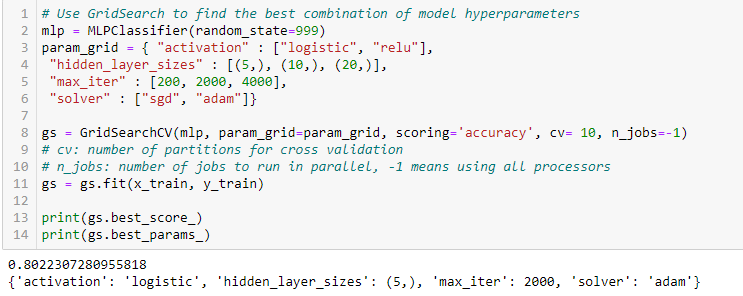

In [47]:
# Build the model using the above suggested hyperparameter values
mlp2 = MLPClassifier(activation ='logistic', hidden_layer_sizes=(5,), max_iter=2000, solver ='adam', random_state=999)
mlp2.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=2000,
              random_state=999)

In [48]:
#Evaluate the model: train acc & test acc
print(mlp2.score(x_train, y_train), '(Train Accuracy)')
print(mlp2.score(x_test, y_test), '(Test Accuracy)')

0.811194429566149 (Train Accuracy)
0.8046038543897216 (Test Accuracy)


In [49]:
results = cross_validate(mlp2, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.81132833 0.80947918 0.81055027 0.80840809 0.80974695]
test_score:  [0.79657388 0.80235672 0.80557043 0.80557043 0.80503482]
cross val training accuracy is: 0.8099025660284971
cross val testing accuracy is: 0.803021256146138


In [50]:
# Add MLP Classifer GSCV into Model Comparison
new_row_mlp2 = {'Model':'MLPClassifier - GridSearchCV', 'Training Accuracy':mlp2.score(x_train, y_train)*100, 'Testing Accuracy':mlp2.score(x_test, y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_mlp2])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True) 

In [51]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729
3,MLPClassifier,76.861275,78.158458,76.914639,76.681705
4,MLPClassifier - GridSearchCV,81.119443,80.460385,80.990257,80.302126


### 1.2.4. Decision Tree  <a id="1.2.4."></a>
[Back to Top](#top)

In [52]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_hr, y_data_hr, test_size=0.2, random_state=9)

In [53]:
# Create Decision Tree Model
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [54]:
#training acc
train_acc = decision_tree.score(x_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = decision_tree.score(x_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.68626138189609
the testing accuracy is:  0.6895074946466809


In [55]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(decision_tree, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.68760043 0.68697282 0.68643727 0.68857946 0.68496452]
test_score:  [0.68415418 0.6866631  0.68880557 0.68023567 0.69469738]


In [56]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.6869109010691792
cross val testing accuracy is: 0.6869111779137024


In [57]:
# Add decision tree into Model Comparison
new_row_dtree1 = {'Model':'DecisionTreeClassifier', 'Training Accuracy':decision_tree.score(x_train, y_train)*100, 'Testing Accuracy':decision_tree.score(x_test, y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_dtree1])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True) 

In [58]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729
3,MLPClassifier,76.861275,78.158458,76.914639,76.681705
4,MLPClassifier - GridSearchCV,81.119443,80.460385,80.990257,80.302126
5,DecisionTreeClassifier,68.626138,68.950749,68.691090,68.691118


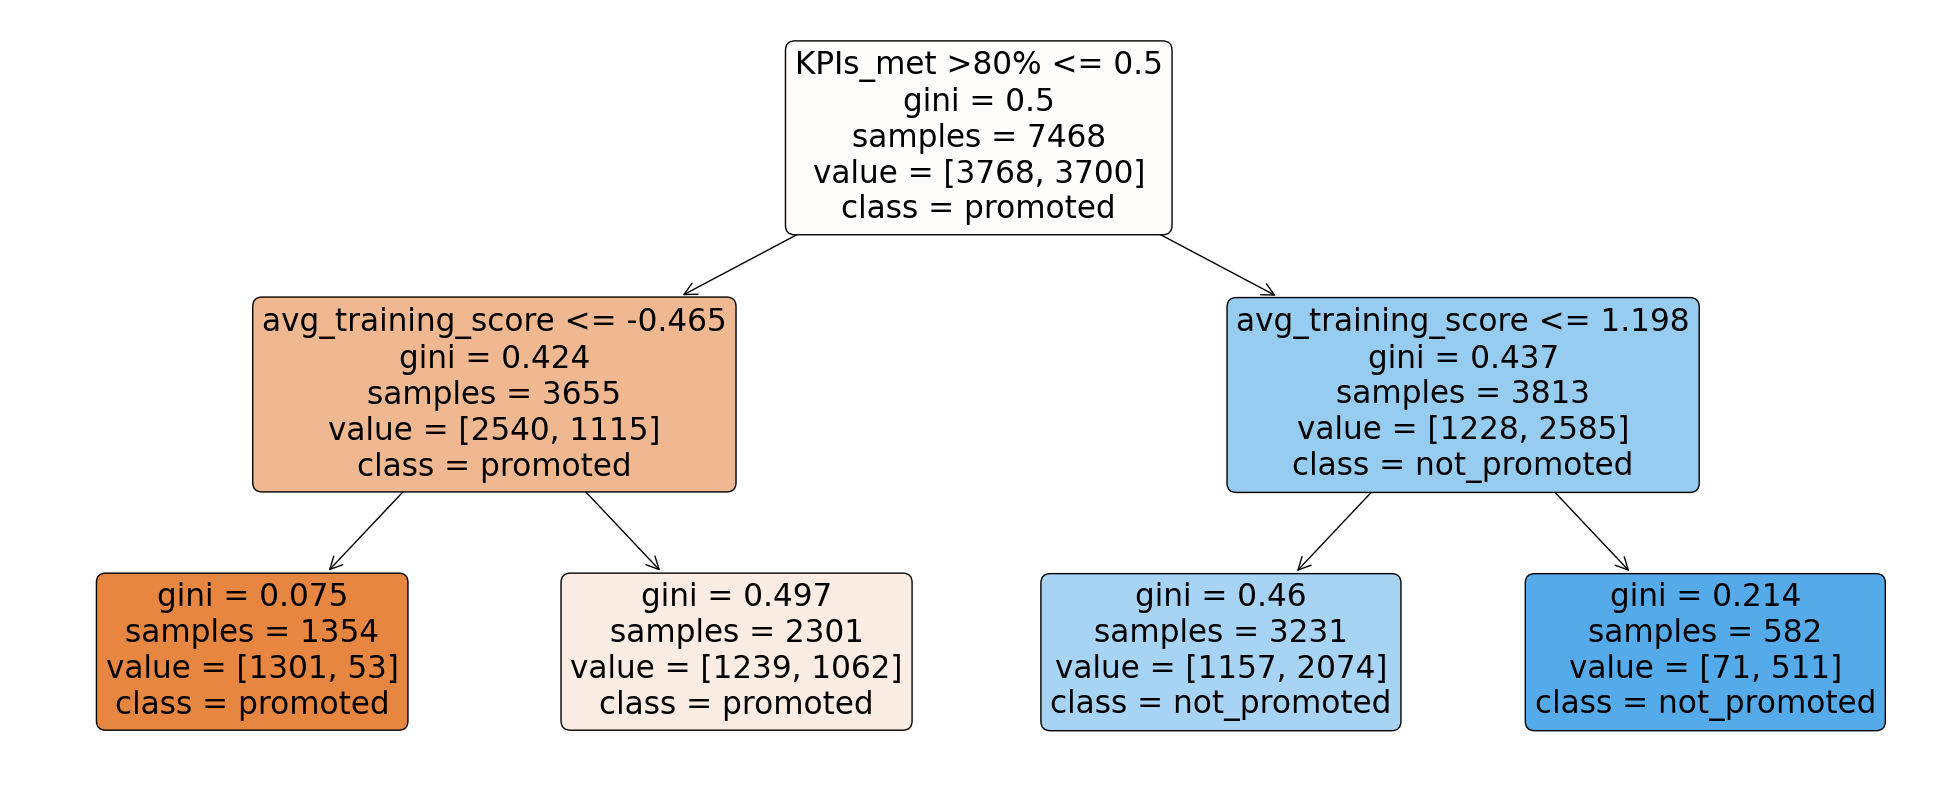

In [59]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(data_hr.drop(['is_promoted'], axis=1)),
                class_names = ['promoted', 'not_promoted'],
                rounded = True,
                filled= True)
plt.show() 

### 1.2.4.1. GridSearch Decision Tree Model <a id="1.2.4.1."></a>
[Back to Top](#top)

In [60]:
# Use GridSearch to find the best combination of model hyperparameters
dt = tree.DecisionTreeClassifier(random_state=999)
param_grid = { "criterion" : ["gini", "entropy"],
     "min_samples_leaf" : [1, 5, 10],
     "min_samples_split" : [2, 4, 10, 12, 16],
     'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors
gs = gs.fit(x_train, y_train) #
print(gs.best_score_)
print(gs.best_params_)

0.7951337073046431
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [61]:
# Create Decision Tree using the best hyperparameters
decision_tree2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 10,min_samples_leaf = 1,min_samples_split =4,
     random_state=999)
decision_tree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=4,
                       random_state=999)

In [62]:
#Evaluate the Model
train_acc = decision_tree2.score(x_train, y_train)
print('the training accuracy is: ', train_acc)
test_acc = decision_tree2.score(x_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.8216389930369576
the testing accuracy is:  0.8029978586723768


In [63]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(decision_tree2, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.82953937 0.82675057 0.82661668 0.82982996 0.83170438]
test_score:  [0.79068522 0.78521693 0.80824853 0.80664167 0.78414569]
cross val training accuracy is: 0.8288881922444228
cross val testing accuracy is: 0.7949876073674516


In [64]:
# Add decision tree GridSeachCV into Model Comparison
new_row_dtree2 = {'Model':'DecisionTreeClassifier - GridSeachCV', 'Training Accuracy':decision_tree2.score(x_train, y_train)*100, 'Testing Accuracy':decision_tree2.score(x_test, y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_dtree2])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True) 

In [65]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729
3,MLPClassifier,76.861275,78.158458,76.914639,76.681705
4,MLPClassifier - GridSearchCV,81.119443,80.460385,80.990257,80.302126
5,DecisionTreeClassifier,68.626138,68.950749,68.691090,68.691118
6,DecisionTreeClassifier - GridSeachCV,82.163899,80.299786,82.888819,79.498761


In [66]:
# Display feature importance in array 
decision_tree2.feature_importances_

array([0.01815071, 0.00231222, 0.00372452, 0.01061929, 0.08972893,
       0.01491449, 0.19848973, 0.03701016, 0.324947  , 0.00380976,
       0.00173974, 0.00530738, 0.0042155 , 0.00050412, 0.11376625,
       0.0285334 , 0.01893092, 0.00489488, 0.00823234, 0.0479868 ,
       0.02766165, 0.00428984, 0.02029965, 0.00083282, 0.00400267,
       0.00069589, 0.00152339, 0.00228076, 0.00059519])

In [67]:
# Display feature importance in table (descending order)
pd.concat((pd.DataFrame(x_train.columns, columns = ['feature']),
 pd.DataFrame(decision_tree2.feature_importances_, columns = ['importance'])),
 axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
8,avg_training_score,0.324947
6,KPIs_met >80%,0.198490
14,department_Sales & Marketing,0.113766
4,previous_year_rating,0.089729
19,department_Operations,0.047987
7,awards_won?,0.037010
15,department_Finance,0.028533
20,department_Procurement,0.027662
22,department_HR,0.020300
16,department_Analytics,0.018931


In [68]:
depth_range = range(2,16)

train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in depth_range:
    # Create Random Forest Model
    tree_class = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d, min_samples_leaf = 1,
                                         min_samples_split =4, random_state=999)
    tree_class.fit(x_train, y_train.ravel()) 
    train_acc.append(tree_class.score(x_train, y_train))
    test_acc.append(tree_class.score(x_test, y_test))
    
    results  = cross_validate(tree_class, x_data_hr, y_data_hr.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))

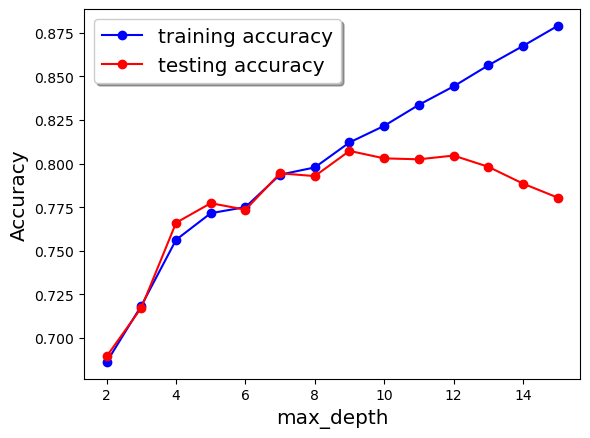

In [69]:
# Plot the simple split measures (train_acc & test_acc) 
plt.plot(depth_range, train_acc, 'bo-', label ='training accuracy')
plt.plot(depth_range, test_acc, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

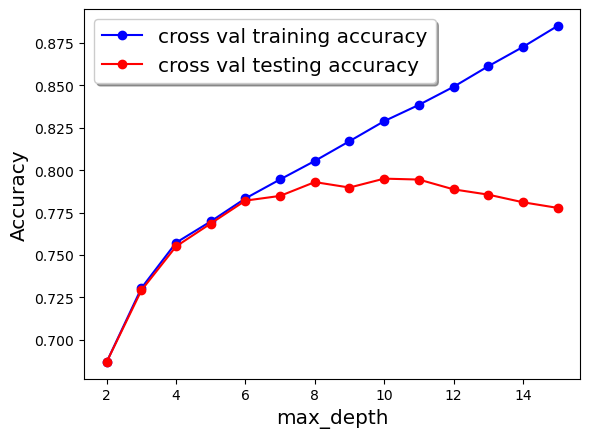

In [70]:
# Plot the cross validation measures (cross_val_train_acc & cross cross_val_test_acc) 
plt.plot(depth_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(depth_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [71]:
# Create Decision Tree using the best hyperparameters
decision_tree3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 9,min_samples_leaf = 1,min_samples_split =4,
     random_state=999)
decision_tree3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4,
                       random_state=999)

In [72]:
print('***Final Decision Tree Classifier Model***')

#Evaluate the Model
train_acc = decision_tree3.score(x_train, y_train)
print('the training accuracy is: ', train_acc)
test_acc = decision_tree3.score(x_test, y_test)
print('the testing accuracy is: ', test_acc)

results = cross_validate(decision_tree3, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
    
print('cross val training accuracy:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Decision Tree Classifier Model***
the training accuracy is:  0.812131762185324
the testing accuracy is:  0.8072805139186295
train_score:  [0.81641671 0.8153702  0.8173785  0.81697684 0.81925291]
test_score:  [0.78265525 0.77771826 0.80503482 0.80289234 0.78039636]
cross val training accuracy: 0.8170790311075458
cross val testing accuracy: 0.789739404901312


In [73]:
#Evaluate the Model
train_acc = decision_tree3.score(x_train, y_train)
print('the training accuracy is: ', train_acc)
test_acc = decision_tree3.score(x_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.812131762185324
the testing accuracy is:  0.8072805139186295


In [74]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(decision_tree3, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.81641671 0.8153702  0.8173785  0.81697684 0.81925291]
test_score:  [0.78265525 0.77771826 0.80503482 0.80289234 0.78039636]
cross val training accuracy is: 0.8170790311075458
cross val testing accuracy is: 0.789739404901312


In [75]:
# Add decision tree GridSeachCV (Visualisations) into Model Comparison
new_row_dtree3 = {'Model':'DecisionTreeClassifier - GridSeachCV(Visualisation)', 'Training Accuracy':decision_tree3.score(x_train, y_train)*100, 'Testing Accuracy':decision_tree3.score(x_test, y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_dtree3])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True) 

In [76]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729
3,MLPClassifier,76.861275,78.158458,76.914639,76.681705
4,MLPClassifier - GridSearchCV,81.119443,80.460385,80.990257,80.302126
5,DecisionTreeClassifier,68.626138,68.950749,68.691090,68.691118
6,DecisionTreeClassifier - GridSeachCV,82.163899,80.299786,82.888819,79.498761
7,DecisionTreeClassifier - GridSeachCV(Visualisa...,81.213176,80.728051,81.707903,78.973940


<b> Bagging Classifer </b>

In [77]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, max_features = 1.0, n_estimators=20 )
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [78]:
train_acc = bg.score(x_train, y_train)
print('the training accuracy is: ', train_acc)

test_acc = bg.score(x_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.9578200321371184
the testing accuracy is:  0.7858672376873662


### 1.2.5. XGBoost - eXtreme Gradient Boosting Classifier <a id="1.2.5."></a>
[Back to Top](#top)

In [79]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_hr, y_data_hr, test_size=0.2, random_state=999)

In [80]:
xgb = XGBClassifier(n_estimators = 20, learning_rate = 0.1, gamma=1,random_state=999)
xgb.fit(x_train, y_train)
print('training accuracy is: ', xgb.score(x_train,y_train))
print('testing accuracy is: ', xgb.score(x_test,y_test))

training accuracy is:  0.7984734868773433
testing accuracy is:  0.7965738758029979


In [81]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(xgb, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.80396358 0.80345428 0.80532869 0.80573035 0.8022493 ]
test_score:  [0.79229122 0.78253883 0.80771291 0.80289234 0.79271559]
cross val training accuracy is: 0.8041452393513973
cross val testing accuracy is: 0.7956301776946377


In [82]:
# Add XGBoost Classifier into Model Comparison
new_row_xgb1 = {'Model':'XGBoost Classifier', 'Training Accuracy':xgb.score(x_train,y_train)*100, 'Testing Accuracy':xgb.score(x_test,y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_xgb1])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True)  

In [83]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729
3,MLPClassifier,76.861275,78.158458,76.914639,76.681705
4,MLPClassifier - GridSearchCV,81.119443,80.460385,80.990257,80.302126
5,DecisionTreeClassifier,68.626138,68.950749,68.691090,68.691118
6,DecisionTreeClassifier - GridSeachCV,82.163899,80.299786,82.888819,79.498761
7,DecisionTreeClassifier - GridSeachCV(Visualisa...,81.213176,80.728051,81.707903,78.973940
8,XGBoost Classifier,79.847349,79.657388,80.414524,79.563018


### 1.2.5.1. Improve XGBoost - eXtreme Gradient Boosting Classifier <a id="1.2.5.1."> </a>
[Back to Top](#top)

In [84]:
# Use GridSearch to find the best combination of model hyperparameters
xgb = XGBClassifier()

param_grid = { 'n_estimators': [10, 20, 30, 40, 50],
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0.5, 1, 1.5, 2, 5]}

gs = RandomizedSearchCV(xgb,  param_distributions=param_grid, n_iter=5, 
                        scoring='accuracy', n_jobs=-1,cv=10,random_state=999)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors
gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8087820450703618
{'n_estimators': 40, 'learning_rate': 0.4, 'gamma': 5}


In [85]:
xgb2 = XGBClassifier(n_estimators = 40, learning_rate = 0.4, gamma = 5 ,random_state=999)
xgb2.fit(x_train, y_train)
print('training accuracy is: ', xgb2.score(x_train,y_train))
print('testing accuracy is: ', xgb2.score(x_test,y_test))

training accuracy is:  0.8330208891269416
testing accuracy is:  0.813169164882227


In [86]:
# Evaluate the Model using K-folds Cross validation
results = cross_validate(xgb2, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.82886984 0.83237381 0.83572098 0.82795555 0.83304325]
test_score:  [0.8003212  0.80342796 0.81842528 0.81253348 0.81146224]
cross val training accuracy is: 0.8315926862992281
cross val testing accuracy is: 0.8092340309374244


In [87]:
# Add XGBoost Classifier into Model Comparison
new_row_xgb1 = {'Model':'XGBoost Classifier - GridSearch', 'Training Accuracy':xgb2.score(x_train,y_train)*100, 'Testing Accuracy':xgb2.score(x_test,y_test)*100, 
           'Cross Val Training Accuracy': sum(results['train_score'])/len(results['train_score'])*100, 'Cross Val Testing Accuracy': sum(results['test_score'])/len(results['test_score'])*100}
new_df = pd.DataFrame([new_row_xgb1])
resultOfModels = pd.concat([resultOfModels, new_df], axis=0, ignore_index=True)  

In [88]:
resultOfModels

,Model,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
0,Naive Baseline,50.147295,49.411135,50.147295,49.411135
1,Logistic Regression,76.968399,78.961456,77.632294,77.228042
2,Logistic Regression - Improved,77.088913,79.175589,77.640328,77.313729
3,MLPClassifier,76.861275,78.158458,76.914639,76.681705
4,MLPClassifier - GridSearchCV,81.119443,80.460385,80.990257,80.302126
5,DecisionTreeClassifier,68.626138,68.950749,68.691090,68.691118
6,DecisionTreeClassifier - GridSeachCV,82.163899,80.299786,82.888819,79.498761
7,DecisionTreeClassifier - GridSeachCV(Visualisa...,81.213176,80.728051,81.707903,78.973940
8,XGBoost Classifier,79.847349,79.657388,80.414524,79.563018
9,XGBoost Classifier - GridSearch,83.302089,81.316916,83.159269,80.923403


### 1.3. Summarize the findings<a id="1.3."></a>
[Back to Top](#top)

In [89]:
modelResult = resultOfModels.groupby('Model')[['Training Accuracy','Testing Accuracy',
                                               'Cross Val Training Accuracy','Cross Val Testing Accuracy']].sum()

In [90]:
modelResult = modelResult.sort_values(ascending=False,by='Cross Val Testing Accuracy')

In [91]:
modelResult = modelResult.round(2)

In [92]:
modelResult

,Training Accuracy,Testing Accuracy,Cross Val Training Accuracy,Cross Val Testing Accuracy
Model,,,,
XGBoost Classifier - GridSearch,83.30,81.32,83.16,80.92
MLPClassifier - GridSearchCV,81.12,80.46,80.99,80.30
XGBoost Classifier,79.85,79.66,80.41,79.56
DecisionTreeClassifier - GridSeachCV,82.16,80.30,82.89,79.50
DecisionTreeClassifier - GridSeachCV(Visualisation),81.21,80.73,81.71,78.97
Logistic Regression - Improved,77.09,79.18,77.64,77.31
Logistic Regression,76.97,78.96,77.63,77.23
MLPClassifier,76.86,78.16,76.91,76.68
DecisionTreeClassifier,68.63,68.95,68.69,68.69


### 1.3.1. Classification Final Model <a id="1.3.1."></a>
[Back to Top](#top)

In [93]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_hr, y_data_hr, test_size=0.2, random_state=999)

In [94]:
# Build the model using the above suggested hyperparameter values
mlp_final = MLPClassifier(activation ='logistic', hidden_layer_sizes=(5,), max_iter=2000, solver ='adam', random_state=999)
mlp_final.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=2000,
              random_state=999)

In [95]:
#Evaluate the model: train acc & test acc
print(mlp_final.score(x_train, y_train), '(Train Accuracy)')
print(mlp_final.score(x_test, y_test), '(Test Accuracy)')

0.811194429566149 (Train Accuracy)
0.8046038543897216 (Test Accuracy)


In [96]:
print('***Final Multi-layer Perceptron Classifier Model***')

results = cross_validate(mlp_final, x_data_hr, y_data_hr, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Multi-layer Perceptron Classifier Model***
train_score:  [0.81132833 0.80947918 0.81055027 0.80840809 0.80974695]
test_score:  [0.79657388 0.80235672 0.80557043 0.80557043 0.80503482]
cross val training accuracy is: 0.8099025660284971
cross val testing accuracy is: 0.803021256146138


## 2. Airbnb <a id="AIRBNB"></a>
[Back to Top](#top)

### 2.1 Load and Sample the data <a id="2.1."></a>
[Back to Top](#top)

In [97]:
data_listings = pd.read_csv("./datasets/listings_new.csv")
data_listings_backup = data_listings.copy() #keep a copy of df 

In [98]:
data_listings.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,...,neighbourhood_Downtown Core,neighbourhood_Singapore River,neighbourhood_Orchard,neighbourhood_Museum,neighbourhood_Bishan,neighbourhood_Southern Islands,room_type_Private room,room_type_Entire home/apt,room_type_Shared room,price
0,-1.904385,-1.714913,1.742860,-2.607617,2.005860,1.245344,-0.820934,-1.411140,0.988777,-6.262193,...,0,0,0,0,0,0,1,0,0,81
1,-1.904385,-1.558300,-0.927086,-1.701976,0.529333,1.245344,-0.999405,0.493502,0.988777,0.382382,...,0,0,0,0,0,0,1,0,0,44
2,-1.904385,-1.558300,-0.950356,-1.589413,2.005860,0.951205,-1.504306,0.493502,0.451140,-0.946533,...,0,0,0,0,0,0,1,0,0,40
3,-1.904385,-1.550971,0.450753,-0.516309,-0.651888,1.539483,1.009771,-0.458819,0.988777,0.382382,...,0,0,0,0,0,0,1,0,0,65
4,-1.904385,-1.558300,-0.865236,-1.669589,2.005860,0.951205,-1.322494,0.493502,0.988777,0.382382,...,0,0,0,0,0,0,1,0,0,44


In [99]:
data_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 45 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   id                                                      5995 non-null   float64
 1   host_id                                                 5995 non-null   float64
 2   latitude                                                5995 non-null   float64
 3   longitude                                               5995 non-null   float64
 4   minimum_nights                                          5995 non-null   float64
 5   number_of_reviews                                       5995 non-null   float64
 6   reviews_per_month                                       5995 non-null   float64
 7   calculated_host_listings_count                          5995 non-null   float64
 8   availability_365                      

In [100]:
# Set the "price" as target/model output and the rest features as model inputs
y_data_listings = data_listings['price']
x_data_listings = data_listings.drop(['price'], axis=1)

In [101]:
y_data_listings.head()

0    81
1    44
2    40
3    65
4    44
Name: price, dtype: int64

In [102]:
x_data_listings.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,...,neighbourhood_Novena,neighbourhood_Downtown Core,neighbourhood_Singapore River,neighbourhood_Orchard,neighbourhood_Museum,neighbourhood_Bishan,neighbourhood_Southern Islands,room_type_Private room,room_type_Entire home/apt,room_type_Shared room
0,-1.904385,-1.714913,1.742860,-2.607617,2.005860,1.245344,-0.820934,-1.411140,0.988777,-6.262193,...,0,0,0,0,0,0,0,1,0,0
1,-1.904385,-1.558300,-0.927086,-1.701976,0.529333,1.245344,-0.999405,0.493502,0.988777,0.382382,...,0,0,0,0,0,0,0,1,0,0
2,-1.904385,-1.558300,-0.950356,-1.589413,2.005860,0.951205,-1.504306,0.493502,0.451140,-0.946533,...,0,0,0,0,0,0,0,1,0,0
3,-1.904385,-1.550971,0.450753,-0.516309,-0.651888,1.539483,1.009771,-0.458819,0.988777,0.382382,...,0,0,0,0,0,0,0,1,0,0
4,-1.904385,-1.558300,-0.865236,-1.669589,2.005860,0.951205,-1.322494,0.493502,0.988777,0.382382,...,0,0,0,0,0,0,0,1,0,0


### 2.2 Build the Model(s)  <a id="2.2."></a>
[Back to Top](#top)

In [103]:
# Create DataFrame for Model Comparison 
resultOfRegModelsDict = {'Model': [], 'Training MAE': [], 'Testing MAE': [], 
                         'Training RMSE': [], 'Testing RMSE': [], 
                         'Training R2': [], 'Testing R2': [], 
                        'Cross Val Training MAE': [], 'Cross Val Testing MAE': [],
                        'Cross Val Training RMSE': [], 'Cross Val Testing RMSE': [],
                        'Cross Val Training R2': [], 'Cross Val Testing R2': []} 
resultOfRegModels = pd.DataFrame(resultOfRegModelsDict)  

In [104]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2


### 2.2.1. Naïve Baseline Model  <a id="2.2.1."></a>
[Back to Top](#top)

In [105]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_listings, y_data_listings, test_size=0.2, random_state=999)

In [106]:
x_train.shape, x_test.shape

((4796, 44), (1199, 44))

In [107]:
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

142.9699749791493
The train mean target value is 142.97.


In [108]:
y_train_preds_naive = [round(mean_target_value,2) for row in x_train.iloc[:,0]]
y_train_preds_naive[0:5]

[142.97, 142.97, 142.97, 142.97, 142.97]

In [109]:
y_test_preds_naive = [round(mean_target_value,2) for row in x_test.iloc[:,0]]
y_test_preds_naive[0:5]

[142.97, 142.97, 142.97, 142.97, 142.97]

In [110]:
# Mean Absolute Error (the lower the better, 0 is best possible score)

# train MAE score
y_true = y_train
y_pred = y_train_preds_naive

train_mae_naive = mean_absolute_error(y_true, y_pred)
print(f"The Naive Baseline Model's MAE on train data is {train_mae_naive:.2f}.")

# test MAE score
y_true = y_test
y_pred = y_test_preds_naive

test_mae_naive = mean_absolute_error(y_true, y_pred)
print(f"The Naive Baseline Model's MAE on test data is {test_mae_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MAE on train data is 68.63.
The Naive Baseline Model's MAE on test data is 68.52.

The Naive Baseline Model's RMSE on train data is 84.92.
The Naive Baseline Model's RMSE on test data is 85.43.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


In [111]:
# Add Naive Baseline model to resultOfRegModelsDict
new_row = {'Model': 'Naive Baseline Model', 'Training MAE': train_mae_naive, 'Testing MAE': test_mae_naive, 
                         'Training RMSE': train_rmse_naive, 'Testing RMSE': test_rmse_naive, 
                         'Training R2': 0, 'Testing R2': 0, 
                        'Cross Val Training MAE': train_mae_naive, 'Cross Val Testing MAE': test_mae_naive,
                        'Cross Val Training RMSE': train_rmse_naive, 'Cross Val Testing RMSE': test_rmse_naive,
                        'Cross Val Training R2': 0, 'Cross Val Testing R2': 0}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [112]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.0,0.0,68.634679,68.519158,84.923269,85.430959,0.0,0.0


### 2.2.2. Linear Regression Model <a id="2.2.2."></a>
[Back to Top](#top)

In [113]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_listings, y_data_listings, test_size=0.2, random_state=999)

In [114]:
lm1 = LinearRegression()
lm1.fit(x_train, y_train)

LinearRegression()

In [115]:
# Calculated the fitted values for training set
y_fitted = lm1.predict(x_train)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(mean_absolute_error(y_fitted, y_train), '(Train MAE)') # MAE: the lower the better
print(lm1.score(x_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

61.675579752847895 (Train RMSE)
46.72608028996053 (Train MAE)
0.47255998213602535 (Train R^2 Value)


In [116]:
# calculated the predicated value for testing data
y_pred = lm1.predict(x_test)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(mean_absolute_error(y_pred, y_test), '(Test MAE)') # MAE: the lower the better
print(lm1.score(x_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

63.8043584663856 (Test RMSE)
47.698981436943626 (Test MAE)
0.44176300784878786 (Test R^2 Value)


In [117]:
# print out the model coefficients and intercept
print(lm1.coef_)
print(lm1.intercept_)

[-4.11772813e+00  8.32150873e+00  2.68895521e-02 -1.82493714e+01
 -1.30909576e+01 -1.12386719e+01  4.74082964e+00 -4.72967087e+00
  1.30497733e+01 -3.72778742e+00 -9.40542897e-01  2.95446135e-01
 -1.50832027e+01 -3.01684998e+01  6.30192954e+01  1.99033819e+01
 -1.44055816e+01 -5.79910357e+00  3.09163038e+01 -1.09919888e+01
  1.63878553e+01 -1.93708141e+01 -4.45388309e+01 -4.48972916e+01
 -5.95754763e+00  4.69014210e+00 -2.49552270e+01 -2.57653665e+00
 -4.55714199e+01  3.50279535e+01 -1.31606586e+01  1.07893360e-01
 -1.45277073e+01 -5.76109038e+00 -1.13890687e+01  2.29190663e+01
 -3.44501907e+00  4.45212087e+01  1.73950546e+01 -2.12073530e+01
  1.13326432e+02 -1.46904314e+01  8.61801426e+01 -7.14897113e+01]
108.82764991885989


In [118]:
# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(lm1, x_data_listings, y_data_listings, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(lm1, x_data_listings, y_data_listings, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(lm1, x_data_listings, y_data_listings, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

train_score:  [-63.09527382 -62.10814496 -61.89924328 -60.86763115 -61.26197365]
test_score:  [-59.17689811 -62.42697058 -62.99899842 -67.93348561 -66.20016654]
cross val training root_mean_squared_error is: 61.846453370372714
cross val testing root_mean_squared_error is: 63.7473038526384

train_score:  [-47.91790071 -47.45082812 -46.66658277 -45.9418314  -45.80256474]
test_score:  [-43.93433456 -45.72146073 -47.35519178 -52.33489461 -53.21307119]
cross val training mean_absolute_error is: 46.75594154756596
cross val testing mean_absolute_error is: 48.511790573951664

train_score:  [0.46535403 0.46372092 0.46450462 0.48813977 0.46688548]
test_score:  [0.39689904 0.44823639 0.46677387 0.336527   0.43130237]
cross val training r2 is: 0.46972096360494975
cross val testing r2 is: 0.4159477343879554


In [119]:
# Add Linear Regression model to resultOfRegModelsDict
new_row = {'Model': 'Linear Regression Model', 'Training MAE': mean_absolute_error(y_fitted, y_train), 'Testing MAE': mean_absolute_error(y_pred, y_test), 
                         'Training RMSE': sqrt(mean_squared_error(y_fitted, y_train)), 'Testing RMSE': sqrt(mean_squared_error(y_pred, y_test)), 
                         'Training R2': lm1.score(x_train, y_train), 'Testing R2': lm1.score(x_test, y_test), 
                        'Cross Val Training MAE':  sum(-mae_results['train_score'])/len(mae_results['train_score']), 'Cross Val Testing MAE': sum(-mae_results['test_score'])/len(mae_results['test_score']),
                        'Cross Val Training RMSE': sum(-rmse_results['train_score'])/len(rmse_results['train_score']), 'Cross Val Testing RMSE': sum(-rmse_results['test_score'])/len(rmse_results['test_score']),
                        'Cross Val Training R2': (sum(r2_results['train_score'])/len(r2_results['train_score'])), 'Cross Val Testing R2': (sum(r2_results['test_score'])/len(r2_results['test_score']))}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [120]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.00000,0.000000,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000
1,Linear Regression Model,46.726080,47.698981,61.675580,63.804358,0.47256,0.441763,46.755942,48.511791,61.846453,63.747304,0.469721,0.415948


### 2.2.2.1. Improve Linear Regression Model  <a id="2.2.2.1."></a>
[Back to Top](#top)

In [121]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model
# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
lm2 = sm.OLS(y_train, x_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:53:21   Log-Likelihood:                -26574.
No. Observations:                4796   AIC:                         5.323e+04
Df Residuals:                    4753   BIC:                         5.351e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
id                                                        -4.1177      1.336     -3.081      0.002      -6.738      -1.498
host_id                                                    8.3215      1.183      7.035      0.000       6.003      10.640
latitude                                                   0.0269      2.729      0.010      0.992      -5.323       5.377
longitude                                                -18.2494      3.656     -4.992      0.000     -25.417     -11.082
minimum_nights                                           -13.0910      1.078    -12.140      0.000     -15.205     -10.977
number_of_reviews                                        -11.2387      1.321     -8.509      0.000     -13.828      -8.649
reviews_per_month                                          4.7408      1.485      3.192      0.001       1.829       7.653
calculated_host_listings_count                            -4.7297      1.328     -3.561      0.000      -7.334      -2.126
availability_365                                          13.0498      1.092     11.946      0.000      10.908      15.191
last_review_year                                          -3.7278      1.295     -2.878      0.004      -6.267      -1.189
last_review_month                                         -0.9405      0.987     -0.953      0.341      -2.876       0.995
last_review_day                                            0.2954      0.897      0.329      0.742      -1.464       2.055
name_Luxury hostel with in-cabin locker - Single mixed   -15.0832     22.518     -0.670      0.503     -59.229      29.063
name_Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT    -30.1685     23.915     -1.261      0.207     -77.053      16.716
name_Studio Apartment - Oakwood Premier                   63.0193     21.150      2.980      0.003      21.555     104.483
name_Superhost 1BR APT in the heart of Tg Pagar           19.9034     25.855      0.770      0.441     -30.785      70.592
name_City-located 1BR loft apartment *BRAND NEW*         -14.4056     25.869     -0.557      0.578     -65.121      36.310
host_name_Jay                                             -5.7991      5.669     -1.023      0.306     -16.913       5.315
host_name_Alvin                                           30.9163      5.069      6.099      0.000      20.978      40.855
host_name_Richards                                       -10.9920      6.158     -1.785      0.074     -23.065       1.081
host_name_Aaron                                           16.3879      6.165      2.658      0.008       4.301      28.474
host_name_Kaurus                                         -19.3708      7.413     -2.613      0.009     -33.904      -4.837
neighbou

In [122]:
#Define Model Inputs (X) and Output (y)

# Set the "is_promoted" as target/model output and the rest features as model inputs
x_data_listings_lm3 = x_data_listings.drop(['latitude','last_review_day','neighbourhood_Toa Payoh',
                                           'name_Luxury hostel with in-cabin locker - Single mixed','neighbourhood_Tanglin',
                                           'name_City-located 1BR loft apartment *BRAND NEW*',
                                           'neighbourhood_Novena','neighbourhood_Bishan'], axis=1)
y_data_listings_lm3 = y_data_listings

In [123]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_listings_lm3, y_data_listings_lm3, test_size=0.2, random_state=999)

In [124]:
lm3 = LinearRegression()
lm3.fit(x_train, y_train)

LinearRegression()

In [125]:
# Calculated the fitted values for training set
y_fitted = lm3.predict(x_train)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(mean_absolute_error(y_fitted, y_train), '(Train MAE)') # MAE: the lower the better
print(lm3.score(x_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

61.68787694843428 (Train RMSE)
46.72663210509768 (Train MAE)
0.4723496337389731 (Train R^2 Value)


In [126]:
# calculated the predicated value for testing data
y_pred = lm3.predict(x_test)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(mean_absolute_error(y_pred, y_test), '(Test MAE)') # MAE: the lower the better
print(lm3.score(x_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

63.82933542029962 (Test RMSE)
47.70484068265605 (Test MAE)
0.44132586565200926 (Test R^2 Value)


In [127]:
# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(lm1, x_data_listings_lm3, y_data_listings_lm3, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(lm3, x_data_listings_lm3, y_data_listings_lm3, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(lm3, x_data_listings_lm3, y_data_listings_lm3, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

train_score:  [-63.13961386 -62.13660192 -61.91928727 -60.96996725 -61.35039477]
test_score:  [-58.97908918 -62.3892185  -63.007746   -67.05768778 -65.71346291]
cross val training root_mean_squared_error is: 61.90317301580611
cross val testing root_mean_squared_error is: 63.42944087348566

train_score:  [-47.92233779 -47.46396788 -46.66844483 -46.05473984 -45.89490451]
test_score:  [-43.76551209 -45.69512917 -47.31284237 -51.43110166 -52.68356395]
cross val training mean_absolute_error is: 46.80087897033328
cross val testing mean_absolute_error is: 48.17762984847803

train_score:  [0.46460232 0.46322938 0.46415776 0.48641715 0.46534545]
test_score:  [0.40092424 0.44890354 0.46662578 0.35352371 0.43963376]
cross val training r2 is: 0.46875041269124945
cross val testing r2 is: 0.4219222038764249


In [128]:
# Add Linear Regression model to resultOfRegModelsDict
new_row = {'Model': 'Linear Regression Model - Improved', 'Training MAE': mean_absolute_error(y_fitted, y_train), 'Testing MAE': mean_absolute_error(y_pred, y_test), 
                         'Training RMSE': sqrt(mean_squared_error(y_fitted, y_train)), 'Testing RMSE': sqrt(mean_squared_error(y_pred, y_test)), 
                         'Training R2': lm3.score(x_train, y_train), 'Testing R2': lm3.score(x_test, y_test), 
                        'Cross Val Training MAE':  sum(-mae_results['train_score'])/len(mae_results['train_score']), 'Cross Val Testing MAE': sum(-mae_results['test_score'])/len(mae_results['test_score']),
                        'Cross Val Training RMSE': sum(-rmse_results['train_score'])/len(rmse_results['train_score']), 'Cross Val Testing RMSE': sum(-rmse_results['test_score'])/len(rmse_results['test_score']),
                        'Cross Val Training R2': (sum(r2_results['train_score'])/len(r2_results['train_score'])), 'Cross Val Testing R2': (sum(r2_results['test_score'])/len(r2_results['test_score']))}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [129]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.00000,0.000000,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000
1,Linear Regression Model,46.726080,47.698981,61.675580,63.804358,0.47256,0.441763,46.755942,48.511791,61.846453,63.747304,0.469721,0.415948
2,Linear Regression Model - Improved,46.726632,47.704841,61.687877,63.829335,0.47235,0.441326,46.800879,48.177630,61.903173,63.429441,0.468750,0.421922


### 2.2.3. Decision Tree Regressor <a id="2.2.3."></a>
[Back to Top](#top)

In [130]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_listings, y_data_listings, test_size=0.2, random_state=999)

In [131]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth = 2, random_state=999)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=999)

In [132]:
#training mae
train_mae = mean_absolute_error(tree_reg.predict(x_train), y_train)
print('the training mean absolute error is: ', train_mae)
#testing mae
test_mae = mean_absolute_error(tree_reg.predict(x_test), y_test)
print('the testing mean absolute error is: ',test_mae)
print()
#training rmse
train_rmse = sqrt(mean_squared_error(tree_reg.predict(x_train), y_train))
print('the training root mean squared error is: ', train_rmse)
#testing rmse
test_rmse = sqrt(mean_squared_error(tree_reg.predict(x_test), y_test))
print('the testing root mean squared error is: ',test_rmse)
print()
# training r2
train_R2 = tree_reg.score(x_train, y_train)
print('training R^2 value is: ', train_R2)
# testing r2
test_R2 = tree_reg.score(x_test, y_test)
print('testing R^2 value is: ', test_R2)

the training mean absolute error is:  50.609924143148874
the testing mean absolute error is:  50.81460837041658

the training root mean squared error is:  65.84649913581522
the testing root mean squared error is:  67.04410224216855

training R^2 value is:  0.39880968471203515
testing R^2 value is:  0.3836334256396726


In [133]:
# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(tree_reg, x_data_listings, y_data_listings, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(tree_reg, x_data_listings, y_data_listings, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(tree_reg, x_data_listings, y_data_listings, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

train_score:  [-67.35186758 -66.38960461 -65.95382613 -64.8592152  -65.43803568]
test_score:  [-61.50551805 -65.10103438 -67.22504973 -71.10429854 -70.08649795]
cross val training root_mean_squared_error is: 65.99850984026911
cross val testing root_mean_squared_error is: 67.0044797305369

train_score:  [-51.96860428 -51.6562832  -50.31359741 -49.58103749 -49.86803511]
test_score:  [-47.02545437 -48.01787337 -50.66705101 -55.75803747 -56.10672153]
cross val training mean_absolute_error is: 50.67751149813298
cross val testing mean_absolute_error is: 51.51502755092673

train_score:  [0.39078313 0.38723507 0.39205395 0.41880487 0.39172628]
test_score:  [0.34850095 0.39995432 0.39283546 0.27314603 0.36257077]
cross val training r2 is: 0.39612065944425057
cross val testing r2 is: 0.35540150621486466


In [134]:
# Add Decision Tree Regressor to resultOfRegModelsDict
new_row = {'Model': 'Decision Tree Regressor', 'Training MAE': train_mae, 'Testing MAE': test_mae,
                         'Training RMSE': train_rmse, 'Testing RMSE': test_rmse, 
                         'Training R2': train_R2, 'Testing R2': test_R2, 
                        'Cross Val Training MAE':  sum(-mae_results['train_score'])/len(mae_results['train_score']), 'Cross Val Testing MAE': sum(-mae_results['test_score'])/len(mae_results['test_score']),
                        'Cross Val Training RMSE': sum(-rmse_results['train_score'])/len(rmse_results['train_score']), 'Cross Val Testing RMSE': sum(-rmse_results['test_score'])/len(rmse_results['test_score']),
                        'Cross Val Training R2': (sum(r2_results['train_score'])/len(r2_results['train_score'])), 'Cross Val Testing R2': (sum(r2_results['test_score'])/len(r2_results['test_score']))}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [135]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.00000,0.000000,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000
1,Linear Regression Model,46.726080,47.698981,61.675580,63.804358,0.47256,0.441763,46.755942,48.511791,61.846453,63.747304,0.469721,0.415948
2,Linear Regression Model - Improved,46.726632,47.704841,61.687877,63.829335,0.47235,0.441326,46.800879,48.177630,61.903173,63.429441,0.468750,0.421922
3,Decision Tree Regressor,50.609924,50.814608,65.846499,67.044102,0.39881,0.383633,50.677511,51.515028,65.998510,67.004480,0.396121,0.355402


### 2.2.3.1. Improve Decision Tree Regressor <a id="2.2.3.1."></a>
[Back to Top](#top)

In [136]:
# Finding best param for tree
tree_reg = tree.DecisionTreeRegressor(random_state=999)
param_grid = { "criterion" : ["squared_error", "absolute_error"],
 "min_samples_leaf" : [1, 5, 10],
 "min_samples_split" : [2, 4, 10, 12, 16],
 'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

gs = GridSearchCV(tree_reg, param_grid=param_grid, scoring='explained_variance', cv= 10, n_jobs=-1)
gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.5218413337368478
{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [137]:
# Use suggest params for DTRegresssor
tree_reg2 = tree.DecisionTreeRegressor(criterion = 'squared_error', max_depth= 10, 
                                      min_samples_leaf= 10, min_samples_split= 2, random_state= 999)
tree_reg2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=999)

In [138]:
#training mae
train_mae = mean_absolute_error(tree_reg2.predict(x_train), y_train)
print('the training mean absolute error is: ', train_mae)
#testing mae
test_mae = mean_absolute_error(tree_reg2.predict(x_test), y_test)
print('the testing mean absolute error is: ',test_mae)
print()
#training rmse
train_rmse = sqrt(mean_squared_error(tree_reg2.predict(x_train), y_train))
print('the training root mean squared error is: ', train_rmse)
#testing rmse
test_rmse = sqrt(mean_squared_error(tree_reg2.predict(x_test), y_test))
print('the testing root mean squared error is: ',test_rmse)
print()
# training r2
train_R2 = tree_reg2.score(x_train, y_train)
print('training R^2 value is: ', train_R2)
# testing r2
test_R2 = tree_reg2.score(x_test, y_test)
print('testing R^2 value is: ', test_R2)

the training mean absolute error is:  33.81877126739842
the testing mean absolute error is:  40.57273919273136

the training root mean squared error is:  47.559536271911476
the testing root mean squared error is:  58.15736363368027

training R^2 value is:  0.6863669517209425
testing R^2 value is:  0.5362036339788261


In [139]:
# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(tree_reg2, x_data_listings, y_data_listings, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(tree_reg2, x_data_listings, y_data_listings, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(tree_reg2, x_data_listings, y_data_listings, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

train_score:  [-47.64306189 -46.66075297 -49.31333168 -46.82709837 -49.4158369 ]
test_score:  [-58.44666262 -60.38576965 -67.1513464  -68.32006969 -69.37238214]
cross val training root_mean_squared_error is: 47.97201636025326
cross val testing root_mean_squared_error is: 64.73524610079339

train_score:  [-33.56438288 -33.22534671 -34.74014616 -32.82322757 -34.42779956]
test_score:  [-40.15593952 -41.9410136  -48.42917542 -50.34817458 -52.77897102]
cross val training mean_absolute_error is: 33.75618057696228
cross val testing mean_absolute_error is: 46.73065482753205

train_score:  [0.69515999 0.69731059 0.66012929 0.69704852 0.65312672]
test_score:  [0.41169159 0.48372898 0.39416608 0.32895436 0.37549421]
cross val training r2 is: 0.6805550203903502
cross val testing r2 is: 0.398807044152328


In [140]:
# Add Decision Tree Regressor to resultOfRegModelsDict
new_row = {'Model': 'Decision Tree Regressor - GridSearchCV', 'Training MAE': train_mae, 'Testing MAE': test_mae,
                         'Training RMSE': train_rmse, 'Testing RMSE': test_rmse, 
                         'Training R2': train_R2, 'Testing R2': test_R2, 
                        'Cross Val Training MAE':  sum(-mae_results['train_score'])/len(mae_results['train_score']), 'Cross Val Testing MAE': sum(-mae_results['test_score'])/len(mae_results['test_score']),
                        'Cross Val Training RMSE': sum(-rmse_results['train_score'])/len(rmse_results['train_score']), 'Cross Val Testing RMSE': sum(-rmse_results['test_score'])/len(rmse_results['test_score']),
                        'Cross Val Training R2': (sum(r2_results['train_score'])/len(r2_results['train_score'])), 'Cross Val Testing R2': (sum(r2_results['test_score'])/len(r2_results['test_score']))}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [141]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000
1,Linear Regression Model,46.726080,47.698981,61.675580,63.804358,0.472560,0.441763,46.755942,48.511791,61.846453,63.747304,0.469721,0.415948
2,Linear Regression Model - Improved,46.726632,47.704841,61.687877,63.829335,0.472350,0.441326,46.800879,48.177630,61.903173,63.429441,0.468750,0.421922
3,Decision Tree Regressor,50.609924,50.814608,65.846499,67.044102,0.398810,0.383633,50.677511,51.515028,65.998510,67.004480,0.396121,0.355402
4,Decision Tree Regressor - GridSearchCV,33.818771,40.572739,47.559536,58.157364,0.686367,0.536204,33.756181,46.730655,47.972016,64.735246,0.680555,0.398807


<b> Evaluate using Graph</b>

<b> R²</b>

In [142]:
depth_range = range(2,16)

train_r2 = []
test_r2 = []
cross_val_train_r2 =[]
cross_val_test_r2 =[]

for d in depth_range:
    # Create Random Forest Model
    tree_regVis = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=d, min_samples_leaf = 10,
                                         min_samples_split =2, random_state=999)
    tree_regVis.fit(x_train, y_train.ravel()) 
    train_r2.append(tree_regVis.score(x_train, y_train))
    test_r2.append(tree_regVis.score(x_test, y_test))
    
    results  = cross_validate(tree_regVis, x_data_listings, y_data_listings.ravel(), scoring='r2', cv=5, return_train_score = True)
    cross_val_train_r2.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_r2.append(sum(results['test_score'])/len(results['test_score']))

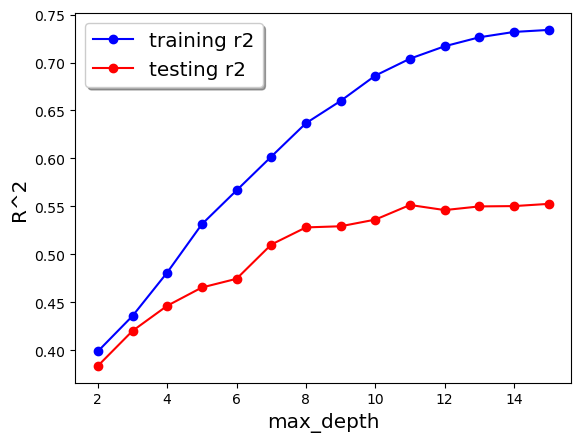

In [143]:
# Plot the simple split measures (train_acc & test_acc) 
plt.plot(depth_range, train_r2, 'bo-', label ='training r2')
plt.plot(depth_range, test_r2, 'ro-', label = 'testing r2')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('R^2', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

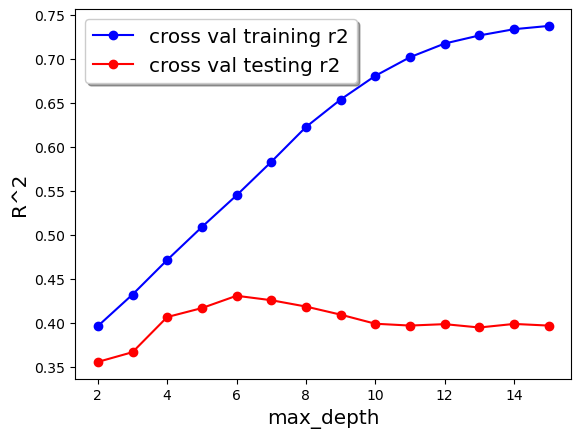

In [144]:
# Plot the cross validation measures (cross_val_train_acc & cross cross_val_test_acc) 
plt.plot(depth_range, cross_val_train_r2, 'bo-', label ='cross val training r2')
plt.plot(depth_range, cross_val_test_r2, 'ro-', label = 'cross val testing r2')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('R^2', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

<b>RMSE</b>

In [145]:
depth_range = range(2,16)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in depth_range:
    # Create Random Forest Model
    tree_regVis = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=d, min_samples_leaf = 10,
                                         min_samples_split =2, random_state=999)
    tree_regVis.fit(x_train, y_train.ravel()) 
    train_rmse.append(sqrt(mean_squared_error(tree_regVis.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(tree_regVis.predict(x_test), y_test)))
    
    
    results  = cross_validate(tree_regVis, x_data_listings, y_data_listings.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

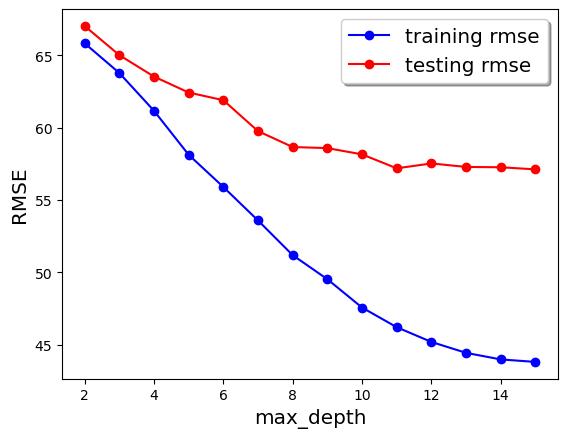

In [146]:
# Plot the simple split measures (train_acc & test_acc) 
plt.plot(depth_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(depth_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

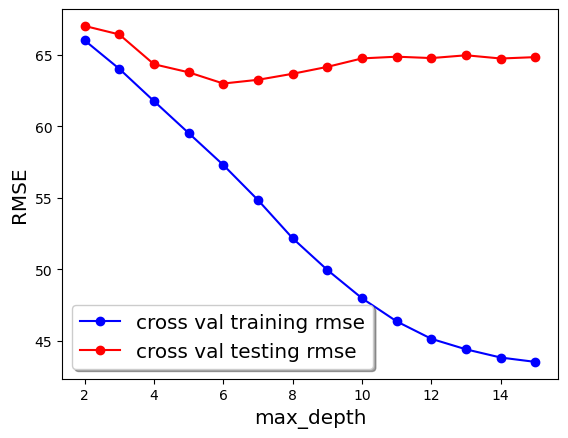

In [147]:
# Plot the cross validation measures (cross_val_train_acc & cross cross_val_test_acc) 
plt.plot(depth_range, cross_val_train_rmse, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test_rmse, 'ro-', label = 'cross val testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

<b>MAE</b>

In [148]:
depth_range = range(2,16)

train_mae = []
test_mae = []
cross_val_train_mae =[]
cross_val_test_mae =[]

for d in depth_range:
    # Create Random Forest Model
    tree_regVis = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=d, min_samples_leaf = 10,
                                         min_samples_split =2, random_state=999)
    tree_regVis.fit(x_train, y_train.ravel()) 
    train_mae.append(mean_absolute_error(tree_regVis.predict(x_train), y_train))
    test_mae.append(mean_absolute_error(tree_regVis.predict(x_test), y_test))
    
    
    results  = cross_validate(tree_regVis, x_data_listings, y_data_listings.ravel(), scoring='neg_median_absolute_error', cv=5, return_train_score = True)
    cross_val_train_mae.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mae.append(sum(-results['test_score'])/len(results['test_score']))

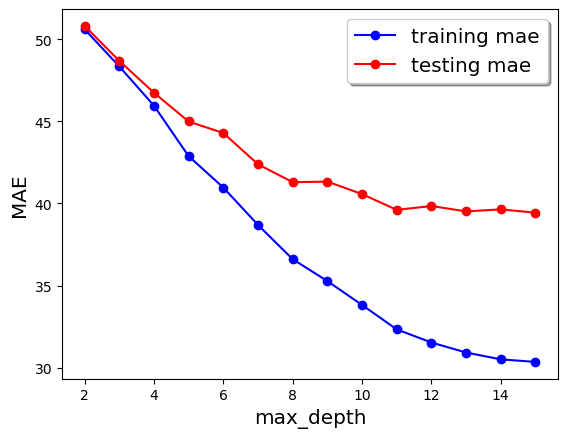

In [149]:
# Plot the simple split measures (train_acc & test_acc) 
plt.plot(depth_range, train_mae, 'bo-', label ='training mae')
plt.plot(depth_range, test_mae, 'ro-', label = 'testing mae')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('MAE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

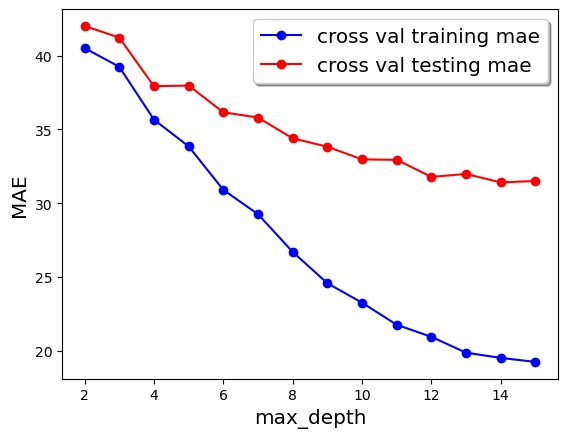

In [150]:
# Plot the cross validation measures (cross_val_train_acc & cross cross_val_test_acc) 
plt.plot(depth_range, cross_val_train_mae, 'bo-', label ='cross val training mae')
plt.plot(depth_range, cross_val_test_mae, 'ro-', label = 'cross val testing mae')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('MAE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [151]:
# Use suggest params for DTRegresssor
tree_reg3 = tree.DecisionTreeRegressor(criterion = 'squared_error', max_depth= 4, 
                                      min_samples_leaf= 10, min_samples_split= 2, random_state= 999)
tree_reg3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=999)

In [152]:
#training mae
train_mae = mean_absolute_error(tree_reg3.predict(x_train), y_train)
print('the training mean absolute error is: ', train_mae)
#testing mae
test_mae = mean_absolute_error(tree_reg3.predict(x_test), y_test)
print('the testing mean absolute error is: ',test_mae)
print()
#training rmse
train_rmse = sqrt(mean_squared_error(tree_reg3.predict(x_train), y_train))
print('the training root mean squared error is: ', train_rmse)
#testing rmse
test_rmse = sqrt(mean_squared_error(tree_reg3.predict(x_test), y_test))
print('the testing root mean squared error is: ',test_rmse)
print()
# training r2
train_R2 = tree_reg3.score(x_train, y_train)
print('training R^2 value is: ', train_R2)
# testing r2
test_R2 = tree_reg3.score(x_test, y_test)
print('testing R^2 value is: ', test_R2)

the training mean absolute error is:  45.95960516901858
the testing mean absolute error is:  46.7463975192766

the training root mean squared error is:  61.17890308245663
the testing root mean squared error is:  63.54157017373305

training R^2 value is:  0.4810207808949384
testing R^2 value is:  0.4463519121142602


In [153]:
# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(tree_reg3, x_data_listings, y_data_listings, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(tree_reg3, x_data_listings, y_data_listings, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(tree_reg3, x_data_listings, y_data_listings, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

train_score:  [-63.55137011 -61.6149371  -61.90953796 -60.23288924 -61.45144181]
test_score:  [-58.15205191 -61.38674247 -65.78325828 -68.12884984 -68.18934572]
cross val training root_mean_squared_error is: 61.75203524462777
cross val testing root_mean_squared_error is: 64.32804964335669

train_score:  [-48.33329562 -46.83401153 -46.26895522 -45.04600114 -46.22255947]
test_score:  [-43.52052108 -44.81527531 -49.27900007 -51.35575538 -54.48931909]
cross val training mean_absolute_error is: 46.54096459573305
cross val testing mean_absolute_error is: 48.69197418461392

train_score:  [0.45759651 0.47220441 0.46432648 0.4987597  0.4635828 ]
test_score:  [0.41760758 0.4664714  0.41860018 0.33270546 0.39661251]
cross val training r2 is: 0.4712939804114171
cross val testing r2 is: 0.40639942514997907


In [154]:
# Add Decision Tree Regressor to resultOfRegModelsDict
new_row = {'Model': 'Decision Tree Regressor - GridSearchCV(Visualisation)', 'Training MAE': train_mae, 'Testing MAE': test_mae,
                         'Training RMSE': train_rmse, 'Testing RMSE': test_rmse, 
                         'Training R2': train_R2, 'Testing R2': test_R2, 
                        'Cross Val Training MAE':  sum(-mae_results['train_score'])/len(mae_results['train_score']), 'Cross Val Testing MAE': sum(-mae_results['test_score'])/len(mae_results['test_score']),
                        'Cross Val Training RMSE': sum(-rmse_results['train_score'])/len(rmse_results['train_score']), 'Cross Val Testing RMSE': sum(-rmse_results['test_score'])/len(rmse_results['test_score']),
                        'Cross Val Training R2': (sum(r2_results['train_score'])/len(r2_results['train_score'])), 'Cross Val Testing R2': (sum(r2_results['test_score'])/len(r2_results['test_score']))}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [155]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000
1,Linear Regression Model,46.726080,47.698981,61.675580,63.804358,0.472560,0.441763,46.755942,48.511791,61.846453,63.747304,0.469721,0.415948
2,Linear Regression Model - Improved,46.726632,47.704841,61.687877,63.829335,0.472350,0.441326,46.800879,48.177630,61.903173,63.429441,0.468750,0.421922
3,Decision Tree Regressor,50.609924,50.814608,65.846499,67.044102,0.398810,0.383633,50.677511,51.515028,65.998510,67.004480,0.396121,0.355402
4,Decision Tree Regressor - GridSearchCV,33.818771,40.572739,47.559536,58.157364,0.686367,0.536204,33.756181,46.730655,47.972016,64.735246,0.680555,0.398807
5,Decision Tree Regressor - GridSearchCV(Visuali...,45.959605,46.746398,61.178903,63.541570,0.481021,0.446352,46.540965,48.691974,61.752035,64.328050,0.471294,0.406399


### 2.2.4. AdaBoost Regressor on Decision Tree Regressor <a id="2.2.4."></a>
[Back to Top](#top)

In [156]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_listings, y_data_listings, test_size=0.2, random_state=999)

In [157]:
# Build Ada Boost Model
adb1= AdaBoostRegressor(tree.DecisionTreeRegressor(criterion = 'squared_error', max_depth= 4, 
                                      min_samples_leaf= 10, min_samples_split= 2, random_state= 999), n_estimators = 20, learning_rate = 0.1, random_state=999)
adb1.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4,
                                                       min_samples_leaf=10,
                                                       random_state=999),
                  learning_rate=0.1, n_estimators=20, random_state=999)

In [158]:
#training mae
train_mae = mean_absolute_error(adb1.predict(x_train), y_train)
print('the training mean absolute error is: ', train_mae)
#testing mae
test_mae = mean_absolute_error(adb1.predict(x_test), y_test)
print('the testing mean absolute error is: ',test_mae)
print()
#training rmse
train_rmse = sqrt(mean_squared_error(adb1.predict(x_train), y_train))
print('the training root mean squared error is: ', train_rmse)
#testing rmse
test_rmse = sqrt(mean_squared_error(adb1.predict(x_test), y_test))
print('the testing root mean squared error is: ',test_rmse)
print()
# training r2
train_R2 = adb1.score(x_train, y_train)
print('training R^2 value is: ', train_R2)
# testing r2
test_R2 = adb1.score(x_test, y_test)
print('testing R^2 value is: ', test_R2)

the training mean absolute error is:  46.70059446246971
the testing mean absolute error is:  47.47405612028214

the training root mean squared error is:  60.1414801815371
the testing root mean squared error is:  62.23269802994893

training R^2 value is:  0.4984724190897992
testing R^2 value is:  0.4689258301305579


In [159]:
# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(adb1, x_data_listings, y_data_listings, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(adb1, x_data_listings, y_data_listings, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(adb1, x_data_listings, y_data_listings, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

train_score:  [-61.70835017 -60.2297282  -59.54220807 -59.12728929 -60.16628259]
test_score:  [-57.92308124 -62.30664859 -63.23051943 -67.62539122 -67.52403326]
cross val training root_mean_squared_error is: 60.15477166100491
cross val testing root_mean_squared_error is: 63.72193474789242

train_score:  [-48.28522054 -47.38326945 -45.79900038 -45.56573825 -46.66306454]
test_score:  [-43.78214435 -47.0183415  -49.2040671  -53.12497382 -55.15680544]
cross val training mean_absolute_error is: 46.739258634190854
cross val testing mean_absolute_error is: 49.65726644293744

train_score:  [0.48860025 0.49566914 0.50450997 0.51699178 0.48578481]
test_score:  [0.42218483 0.45036129 0.46284746 0.34253137 0.40832938]
cross val training r2 is: 0.4983111886559886
cross val testing r2 is: 0.41725086490665547


In [160]:
# Add Decision Tree Regressor to resultOfRegModelsDict
new_row = {'Model': 'AdaBoost on Decision Tree Regressor', 'Training MAE': train_mae, 'Testing MAE': test_mae,
                         'Training RMSE': train_rmse, 'Testing RMSE': test_rmse, 
                         'Training R2': train_R2, 'Testing R2': test_R2, 
                        'Cross Val Training MAE':  sum(-mae_results['train_score'])/len(mae_results['train_score']), 'Cross Val Testing MAE': sum(-mae_results['test_score'])/len(mae_results['test_score']),
                        'Cross Val Training RMSE': sum(-rmse_results['train_score'])/len(rmse_results['train_score']), 'Cross Val Testing RMSE': sum(-rmse_results['test_score'])/len(rmse_results['test_score']),
                        'Cross Val Training R2': (sum(r2_results['train_score'])/len(r2_results['train_score'])), 'Cross Val Testing R2': (sum(r2_results['test_score'])/len(r2_results['test_score']))}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [161]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000
1,Linear Regression Model,46.726080,47.698981,61.675580,63.804358,0.472560,0.441763,46.755942,48.511791,61.846453,63.747304,0.469721,0.415948
2,Linear Regression Model - Improved,46.726632,47.704841,61.687877,63.829335,0.472350,0.441326,46.800879,48.177630,61.903173,63.429441,0.468750,0.421922
3,Decision Tree Regressor,50.609924,50.814608,65.846499,67.044102,0.398810,0.383633,50.677511,51.515028,65.998510,67.004480,0.396121,0.355402
4,Decision Tree Regressor - GridSearchCV,33.818771,40.572739,47.559536,58.157364,0.686367,0.536204,33.756181,46.730655,47.972016,64.735246,0.680555,0.398807
5,Decision Tree Regressor - GridSearchCV(Visuali...,45.959605,46.746398,61.178903,63.541570,0.481021,0.446352,46.540965,48.691974,61.752035,64.328050,0.471294,0.406399
6,AdaBoost on Decision Tree Regressor,46.700594,47.474056,60.141480,62.232698,0.498472,0.468926,46.739259,49.657266,60.154772,63.721935,0.498311,0.417251


### 2.2.4.1. Improve AdaBoost Regressor on Decision Tree Regressor <a id="2.2.4.1."></a>
[Back to Top](#top)

In [162]:
# Use GridSearch to find the best combination of model hyperparameters
adb_dtr = AdaBoostRegressor(tree.DecisionTreeRegressor(criterion = 'squared_error', max_depth= 4, 
                                      min_samples_leaf= 10, min_samples_split= 2, random_state= 999),random_state= 999)
param_grid = { "n_estimators" : [10, 20, 30, 40, 50],
             "learning_rate" : [0.1, 0.2, 0.4, 0.5]}

gs = GridSearchCV(adb_dtr, param_grid=param_grid, scoring='explained_variance', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors
gs = gs.fit(x_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.48216729646462725
{'learning_rate': 0.1, 'n_estimators': 50}


In [163]:
# Build Ada Boost Model and Evaluate both training and testing accuracy
adb2= AdaBoostRegressor(tree.DecisionTreeRegressor(criterion = 'squared_error', max_depth= 4, 
                            min_samples_leaf= 10, min_samples_split= 2, random_state= 999)
                        , n_estimators = 50, learning_rate = 0.1,random_state= 999)
adb2.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4,
                                                       min_samples_leaf=10,
                                                       random_state=999),
                  learning_rate=0.1, random_state=999)

In [164]:
#training mae
train_mae = mean_absolute_error(adb2.predict(x_train), y_train)
print('the training mean absolute error is: ', train_mae)
#testing mae
test_mae = mean_absolute_error(adb2.predict(x_test), y_test)
print('the testing mean absolute error is: ',test_mae)
print()
#training rmse
train_rmse = sqrt(mean_squared_error(adb2.predict(x_train), y_train))
print('the training root mean squared error is: ', train_rmse)
#testing rmse
test_rmse = sqrt(mean_squared_error(adb2.predict(x_test), y_test))
print('the testing root mean squared error is: ',test_rmse)
print()
# training r2
train_R2 = adb2.score(x_train, y_train)
print('training R^2 value is: ', train_R2)
# testing r2
test_R2 = adb2.score(x_test, y_test)
print('testing R^2 value is: ', test_R2)

the training mean absolute error is:  48.7832054124154
the testing mean absolute error is:  49.67529066811065

the training root mean squared error is:  60.63293264510305
the testing root mean squared error is:  62.44929840635208

training R^2 value is:  0.4902423582157719
testing R^2 value is:  0.4652225985268036


In [165]:
# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(adb2, x_data_listings, y_data_listings, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(adb2, x_data_listings, y_data_listings, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(adb2, x_data_listings, y_data_listings, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

train_score:  [-62.25023141 -60.97065269 -60.37893135 -59.98591275 -60.50393396]
test_score:  [-58.9935378  -62.44015487 -63.47847259 -67.82241552 -68.3427225 ]
cross val training root_mean_squared_error is: 60.81793243037265
cross val testing root_mean_squared_error is: 64.21546065539643

train_score:  [-50.0233509  -49.62167941 -48.80493417 -48.17842752 -48.61402706]
test_score:  [-46.30488152 -48.7748811  -50.87463774 -55.07071828 -56.65131271]
cross val training mean_absolute_error is: 49.04848381091996
cross val testing mean_absolute_error is: 51.53528626861896

train_score:  [0.47957928 0.48318462 0.49048627 0.50286181 0.47999709]
test_score:  [0.40063068 0.44800331 0.4586264  0.33869476 0.39389508]
cross val training r2 is: 0.4872218139118428
cross val testing r2 is: 0.40797004779380774


In [166]:
# Add AdaBoost on Decision Tree Regressor to resultOfRegModelsDict
new_row = {'Model': 'AdaBoost on Decision Tree Regressor - GridSearchCV', 'Training MAE': train_mae, 'Testing MAE': test_mae,
                         'Training RMSE': train_rmse, 'Testing RMSE': test_rmse, 
                         'Training R2': train_R2, 'Testing R2': test_R2, 
                        'Cross Val Training MAE':  sum(-mae_results['train_score'])/len(mae_results['train_score']), 'Cross Val Testing MAE': sum(-mae_results['test_score'])/len(mae_results['test_score']),
                        'Cross Val Training RMSE': sum(-rmse_results['train_score'])/len(rmse_results['train_score']), 'Cross Val Testing RMSE': sum(-rmse_results['test_score'])/len(rmse_results['test_score']),
                        'Cross Val Training R2': (sum(r2_results['train_score'])/len(r2_results['train_score'])), 'Cross Val Testing R2': (sum(r2_results['test_score'])/len(r2_results['test_score']))}
new_df = pd.DataFrame([new_row])
resultOfRegModels = pd.concat([resultOfRegModels, new_df], axis=0, ignore_index=True) 

In [167]:
resultOfRegModels

,Model,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
0,Naive Baseline Model,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000,68.634679,68.519158,84.923269,85.430959,0.000000,0.000000
1,Linear Regression Model,46.726080,47.698981,61.675580,63.804358,0.472560,0.441763,46.755942,48.511791,61.846453,63.747304,0.469721,0.415948
2,Linear Regression Model - Improved,46.726632,47.704841,61.687877,63.829335,0.472350,0.441326,46.800879,48.177630,61.903173,63.429441,0.468750,0.421922
3,Decision Tree Regressor,50.609924,50.814608,65.846499,67.044102,0.398810,0.383633,50.677511,51.515028,65.998510,67.004480,0.396121,0.355402
4,Decision Tree Regressor - GridSearchCV,33.818771,40.572739,47.559536,58.157364,0.686367,0.536204,33.756181,46.730655,47.972016,64.735246,0.680555,0.398807
5,Decision Tree Regressor - GridSearchCV(Visuali...,45.959605,46.746398,61.178903,63.541570,0.481021,0.446352,46.540965,48.691974,61.752035,64.328050,0.471294,0.406399
6,AdaBoost on Decision Tree Regressor,46.700594,47.474056,60.141480,62.232698,0.498472,0.468926,46.739259,49.657266,60.154772,63.721935,0.498311,0.417251
7,AdaBoost on Decision Tree Regressor - GridSear...,48.783205,49.675291,60.632933,62.449298,0.490242,0.465223,49.048484,51.535286,60.817932,64.215461,0.487222,0.407970


### 2.3. Summarize the findings <a id="2.3."></a>
[Back to Top](#top)   

In [168]:
resultOfRegModels.columns

Index(['Model', 'Training MAE', 'Testing MAE', 'Training RMSE', 'Testing RMSE',
       'Training R2', 'Testing R2', 'Cross Val Training MAE',
       'Cross Val Testing MAE', 'Cross Val Training RMSE',
       'Cross Val Testing RMSE', 'Cross Val Training R2',
       'Cross Val Testing R2'],
      dtype='object')

In [169]:
resultOfRegModels = resultOfRegModels.groupby('Model')[['Training MAE', 'Testing MAE', 'Training RMSE', 'Testing RMSE',
       'Training R2', 'Testing R2', 'Cross Val Training MAE',
       'Cross Val Testing MAE', 'Cross Val Training RMSE',
       'Cross Val Testing RMSE', 'Cross Val Training R2',
       'Cross Val Testing R2']].sum()

In [170]:
resultOfRegModels.round(2)

,Training MAE,Testing MAE,Training RMSE,Testing RMSE,Training R2,Testing R2,Cross Val Training MAE,Cross Val Testing MAE,Cross Val Training RMSE,Cross Val Testing RMSE,Cross Val Training R2,Cross Val Testing R2
Model,,,,,,,,,,,,
AdaBoost on Decision Tree Regressor,46.70,47.47,60.14,62.23,0.50,0.47,46.74,49.66,60.15,63.72,0.50,0.42
AdaBoost on Decision Tree Regressor - GridSearchCV,48.78,49.68,60.63,62.45,0.49,0.47,49.05,51.54,60.82,64.22,0.49,0.41
Decision Tree Regressor,50.61,50.81,65.85,67.04,0.40,0.38,50.68,51.52,66.00,67.00,0.40,0.36
Decision Tree Regressor - GridSearchCV,33.82,40.57,47.56,58.16,0.69,0.54,33.76,46.73,47.97,64.74,0.68,0.40
Decision Tree Regressor - GridSearchCV(Visualisation),45.96,46.75,61.18,63.54,0.48,0.45,46.54,48.69,61.75,64.33,0.47,0.41
Linear Regression Model,46.73,47.70,61.68,63.80,0.47,0.44,46.76,48.51,61.85,63.75,0.47,0.42
Linear Regression Model - Improved,46.73,47.70,61.69,63.83,0.47,0.44,46.80,48.18,61.90,63.43,0.47,0.42
Naive Baseline Model,68.63,68.52,84.92,85.43,0.00,0.00,68.63,68.52,84.92,85.43,0.00,0.00


### 2.3.1. Regression Final Model <a id="2.3.1."></a>
[Back to Top](#top)

In [171]:
#Define Model Inputs (X) and Output (y)

# Set the "is_promoted" as target/model output and the rest features as model inputs
x_data_listings_final = x_data_listings.drop(['latitude','last_review_day','neighbourhood_Toa Payoh',
                                           'name_Luxury hostel with in-cabin locker - Single mixed','neighbourhood_Tanglin',
                                           'name_City-located 1BR loft apartment *BRAND NEW*',
                                           'neighbourhood_Novena','neighbourhood_Bishan'], axis=1)
y_data_listings_final = y_data_listings

In [172]:
# Split both Inputs (X) and Ouput (y) into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data_listings_final, y_data_listings_final, test_size=0.2, random_state=999)

In [173]:
lm_final = LinearRegression()
lm_final.fit(x_train, y_train)

LinearRegression()

In [174]:
# Calculated the fitted values for training set
y_fitted = lm_final.predict(x_train)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(mean_absolute_error(y_fitted, y_train), '(Train MAE)') # MAE: the lower the better
print(lm_final.score(x_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

61.68787694843428 (Train RMSE)
46.72663210509768 (Train MAE)
0.4723496337389731 (Train R^2 Value)


In [175]:
# calculated the predicated value for testing data
y_pred = lm_final.predict(x_test)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(mean_absolute_error(y_pred, y_test), '(Test MAE)') # MAE: the lower the better
print(lm_final.score(x_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

63.82933542029962 (Test RMSE)
47.70484068265605 (Test MAE)
0.44132586565200926 (Test R^2 Value)


In [176]:
print('***Final Linear Regression Model (Improved)***')

# Evaluate the Model using K-folds Cross validation  RMSE
rmse_results = cross_validate(lm_final, x_data_listings_final, y_data_listings_final, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rmse_results['train_score'])
print('test_score: ', rmse_results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-rmse_results['train_score'])/len(rmse_results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-rmse_results['test_score'])/len(rmse_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  MAE
mae_results = cross_validate(lm_final, x_data_listings_final, y_data_listings_final, scoring='neg_mean_absolute_error', cv=5, return_train_score = True)
print('train_score: ', mae_results['train_score'])
print('test_score: ', mae_results['test_score'])
print('cross val training mean_absolute_error is:', sum(-mae_results['train_score'])/len(mae_results['train_score']))
print('cross val testing mean_absolute_error is:', sum(-mae_results['test_score'])/len(mae_results['test_score']))
print()
# Evaluate the Model using K-folds Cross validation  R2
r2_results = cross_validate(lm_final, x_data_listings_final, y_data_listings_final, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', r2_results['train_score'])
print('test_score: ', r2_results['test_score'])
print('cross val training r2 is:', sum(r2_results['train_score'])/len(r2_results['train_score']))
print('cross val testing r2 is:', sum(r2_results['test_score'])/len(r2_results['test_score']))

***Final Linear Regression Model (Improved)***
train_score:  [-63.13961386 -62.13660192 -61.91928727 -60.96996725 -61.35039477]
test_score:  [-58.97908918 -62.3892185  -63.007746   -67.05768778 -65.71346291]
cross val training root_mean_squared_error is: 61.90317301580611
cross val testing root_mean_squared_error is: 63.42944087348566

train_score:  [-47.92233779 -47.46396788 -46.66844483 -46.05473984 -45.89490451]
test_score:  [-43.76551209 -45.69512917 -47.31284237 -51.43110166 -52.68356395]
cross val training mean_absolute_error is: 46.80087897033328
cross val testing mean_absolute_error is: 48.17762984847803

train_score:  [0.46460232 0.46322938 0.46415776 0.48641715 0.46534545]
test_score:  [0.40092424 0.44890354 0.46662578 0.35352371 0.43963376]
cross val training r2 is: 0.46875041269124945
cross val testing r2 is: 0.4219222038764249


~ End ~